In [1]:
# import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [6]:
# Load the Excel file 
df = pd.read_excel("bank.xlsx")
# Display the first few rows to understand the structure
df.head()


,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,.


In [7]:
# Drop unnecessary columns
df = df.drop(columns=['Account No', 'CHQ.NO.', '.', 'TRANSACTION DETAILS'], errors='ignore')

In [10]:
# Fill NaNs with 0 (common for either withdrawal or deposit)
df['WITHDRAWAL AMT'] = df['WITHDRAWAL AMT'].fillna(0)
df['DEPOSIT AMT'] = df['DEPOSIT AMT'].fillna(0)
# Drop rows only if BALANCE is missing
df = df.dropna(subset=['BALANCE AMT'])

In [11]:
# Choose columns that are useful for detecting fraud or abnormal behavior
# Keep only numeric columns for DBSCAN
features = ['WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT']
X = df[features].copy()

In [12]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Run DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)

In [14]:
# Add labels to the original dataframe
df['Cluster'] = labels

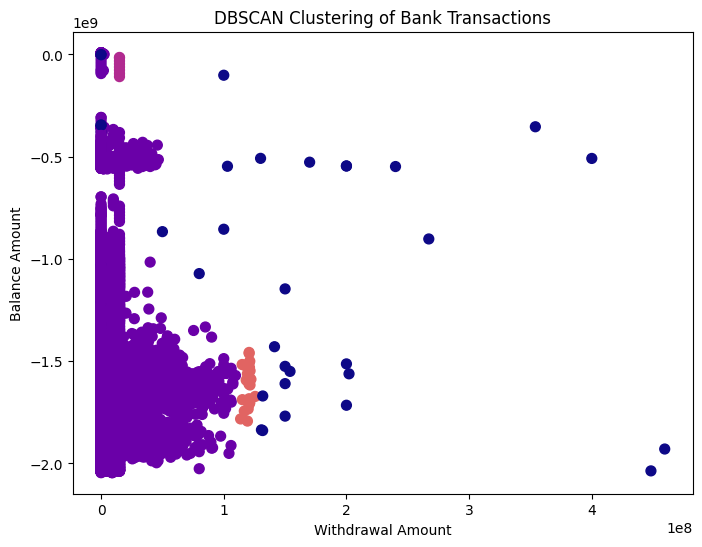

In [15]:
# Visualize clusters using two dimensions
plt.figure(figsize=(8, 6))
plt.scatter(df['WITHDRAWAL AMT'], df['BALANCE AMT'], c=df['Cluster'], cmap='plasma', s=50)
plt.xlabel('Withdrawal Amount')
plt.ylabel('Balance Amount')
plt.title('DBSCAN Clustering of Bank Transactions')
plt.show()
